# Лабораторна робота 2.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

/var/folders/91/dggs7d9x7gqf_kcxkqwh61mr0000gn/T/ipykernel_17717/614420156.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз'яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

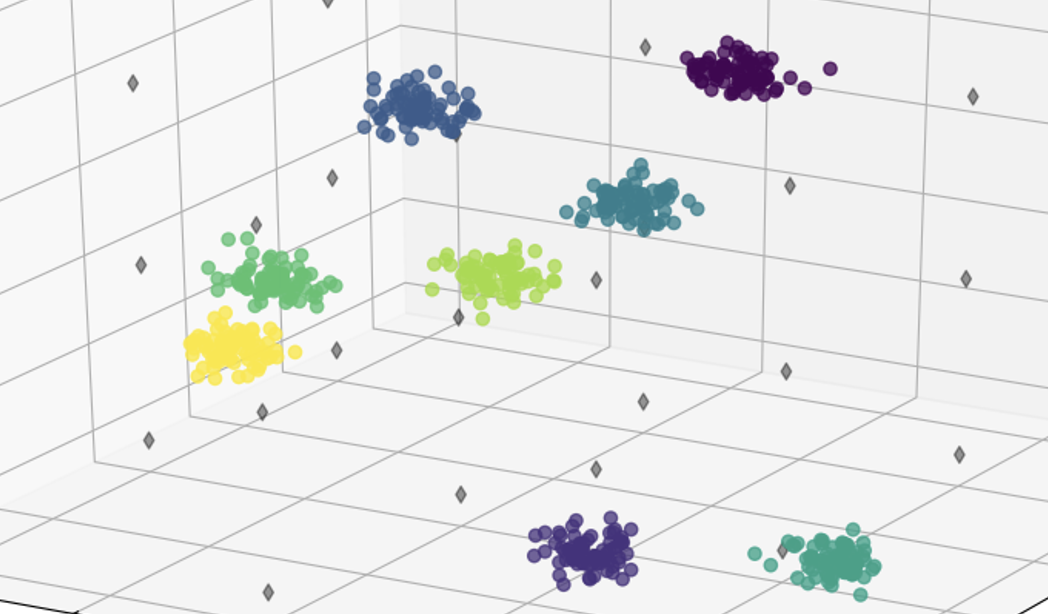

### Спосіб 1 - використання `sklearn та make_blobs`

In [2]:
centroids = [[3, 3], [6, 6]]
samples = 1000
noise = 0.5

In [3]:
X, y = make_blobs(n_samples=samples, centers=centroids, cluster_std=noise, n_features=2, random_state=0)

In [4]:
test_df1 = pd.DataFrame(data=X, columns=["x", "y"])
test_df1["class"] = y 

test_df1.to_csv("./first_test_dataset_sklearn", index=False)

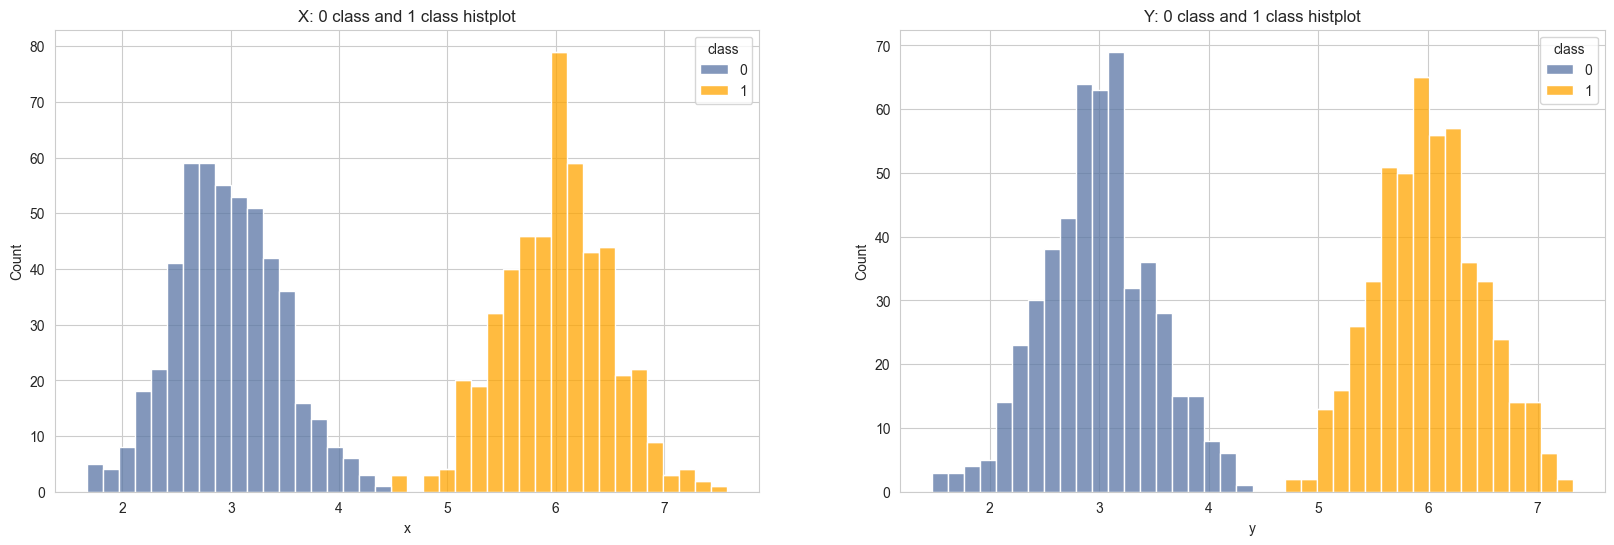

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(data=test_df1, x="x", ax=ax1, hue="class", palette=["#5975A4", "orange"], bins=40, multiple="stack")
ax1.set_title("X: 0 class and 1 class histplot") 

sns.histplot(data=test_df1, x="y", ax=ax2, hue="class", palette=["#5975A4", "orange"], bins=40, multiple="stack")
ax2.set_title("Y: 0 class and 1 class histplot")

plt.show()

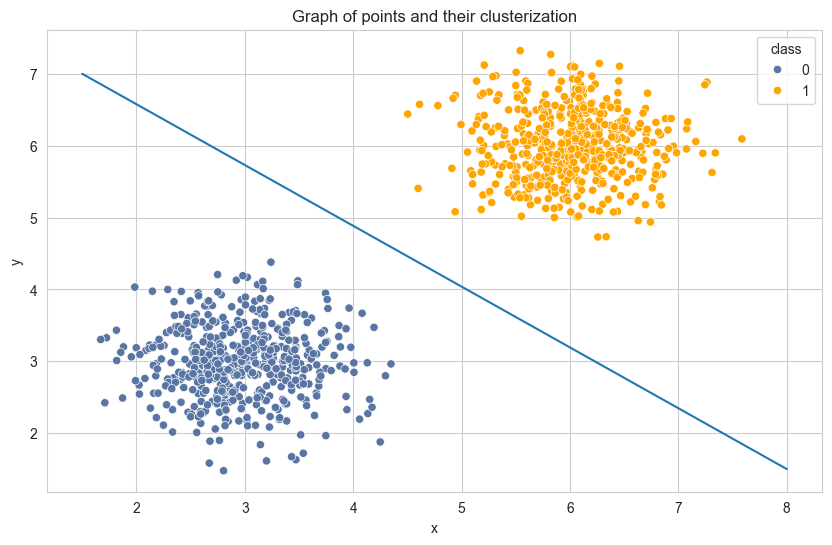

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.scatterplot(data=test_df1, x="x", y="y", hue="class", palette=["#5975A4", "orange"], ax=ax)
plt.plot([1.5, 8], [7, 1.5])
ax.set_title("Graph of points and their clusterization")

plt.show()

### Спосіб 2 - використання `numpy.random.normal`

In [7]:
samples = 500

In [8]:
np.random.seed(42)

class_0 = np.random.normal(loc=centroids[0], scale=noise, size=(samples, 2))
class_1 = np.random.normal(loc=centroids[1], scale=noise, size=(samples, 2))

class_0_labels = np.zeros((samples, 1))
class_1_labels = np.ones((samples, 1))

class_0_dots = np.hstack((class_0, class_0_labels))
class_1_dots = np.hstack((class_1, class_1_labels))

all_dots = np.vstack((class_0_dots, class_1_dots))
test_df1_numpy = pd.DataFrame(data=all_dots, columns=["x", "y", "class"])

test_df1_numpy["class"] = test_df1_numpy["class"].astype('int64')

In [9]:
test_df1_numpy.to_csv("./first_test_dataset_numpy", index=False)

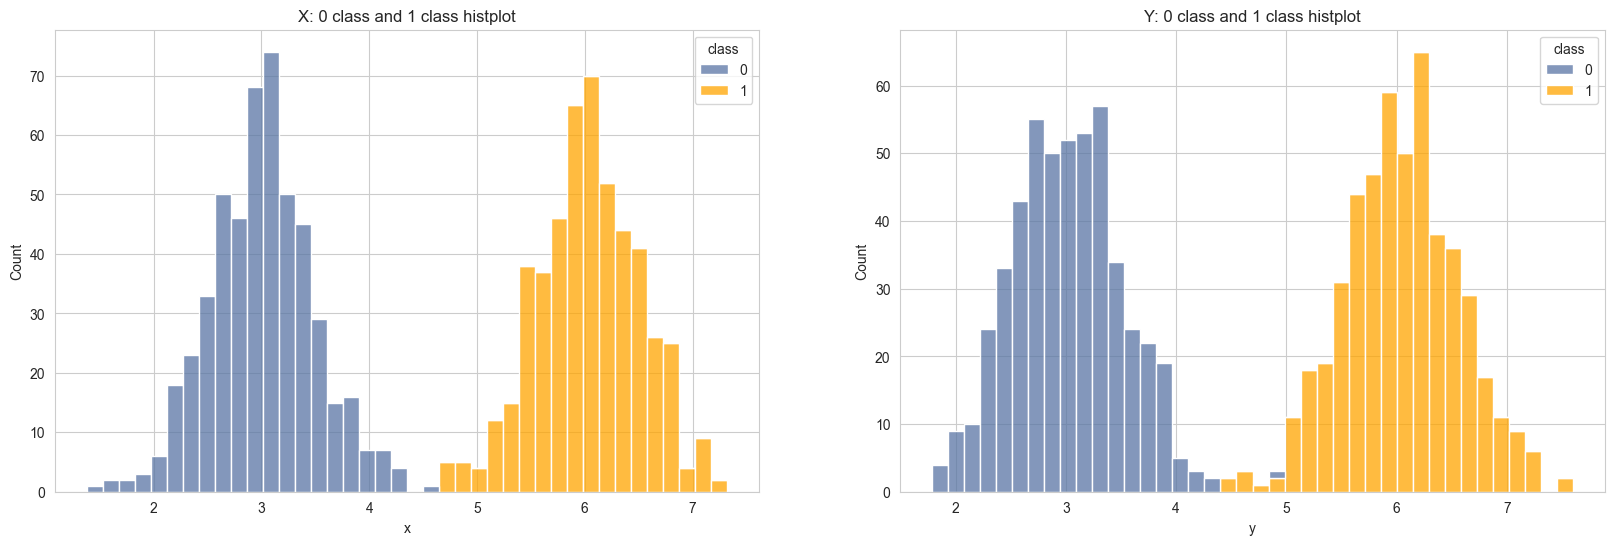

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(data=test_df1_numpy, x="x", ax=ax1, hue="class", palette=["#5975A4", "orange"], bins=40, multiple="stack")
ax1.set_title("X: 0 class and 1 class histplot")

sns.histplot(data=test_df1_numpy, x="y", ax=ax2, hue="class", palette=["#5975A4", "orange"], bins=40, multiple="stack")
ax2.set_title("Y: 0 class and 1 class histplot")

plt.show()

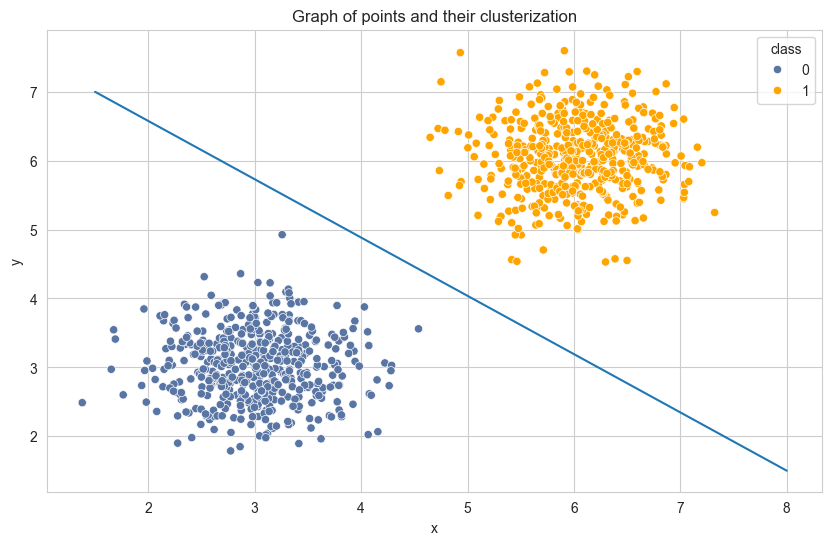

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.scatterplot(data=test_df1_numpy, x='x', y='y', hue="class", palette=['#5975A4', 'orange'], ax=ax)
plt.plot([1.5, 8], [7, 1.5])
ax.set_title("Graph of points and their clusterization")

plt.show()

**`Висновок:`**

1. Для генерації даного датасету використовувалися два методи: `make_blobs` з `sklearn` та  `np.random.normal` з `numpy`. Другий метод дозволяє згенерувати точки використовуючи саме нормальний розподіл. Проте, він вимагає більше коду. Для обох методів було використано однакові параметри аби порівняти результати роботи двох підходів та обрати найліпший результат. Візуалізації вийшли відносно схожими в двох випадках, тому надалі буде використовуватись `make_blobs`, оскільки налаштовувати його буде швидше.

2. Перед генерацією було вказано (як необхідні параметри) `два центроїди` (навколо яких генерувалися точки двох класів), `кількість об'єктів` та `шум`. Зі збільшенням шуму дані стають більш розбіжними і чітко розділити їх на класи стає важче, тому я залишила показник в `0.5`.

3. Якщо подивитись на гістограми розподілу, то вони наближені до нормального. Проте, оскільки ми додали шум аби зробити дані більш реалістичними, розподіл лише наближений до нормального.

4. Щодо скатерплоту, то на ньому чітко видно розділення на два класи. Якраз за допомогою зміни шуму можна побачити як змінюється візуалізація цього графіку.

**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз'яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

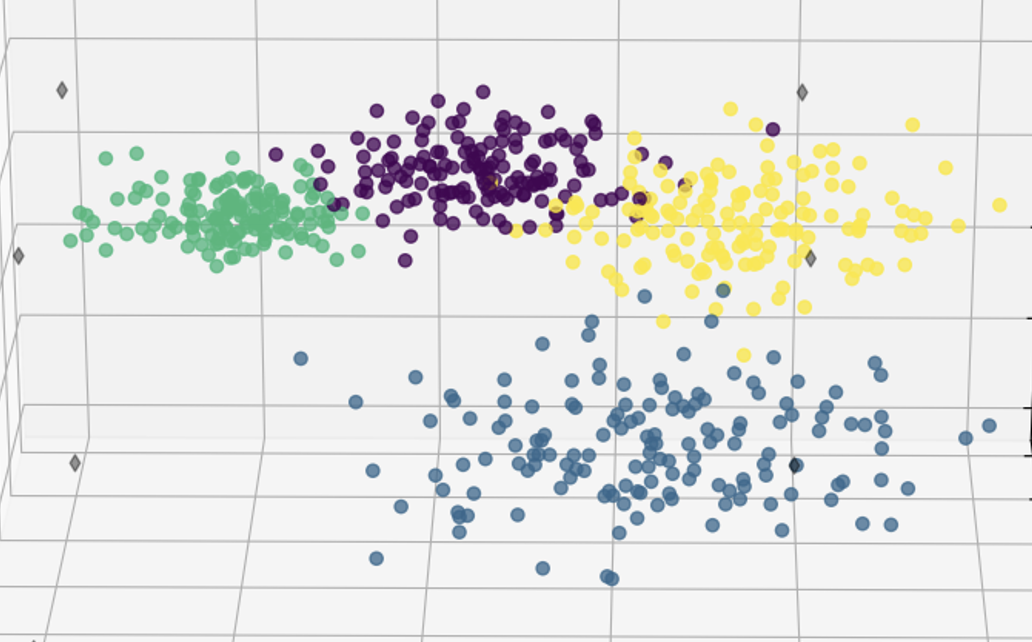

In [12]:
centroids = [[2, 1], [6, 6], [10, 9]]
samples = 900
noise = 2

In [13]:
X, y = make_blobs(n_samples=samples, centers=centroids, cluster_std=noise, n_features=3, random_state=0)

In [14]:
test_df2 = pd.DataFrame(data=X, columns=["x", "y"])
test_df2["class"] = y 

test_df2.to_csv("./second_test_dataset", index=False)

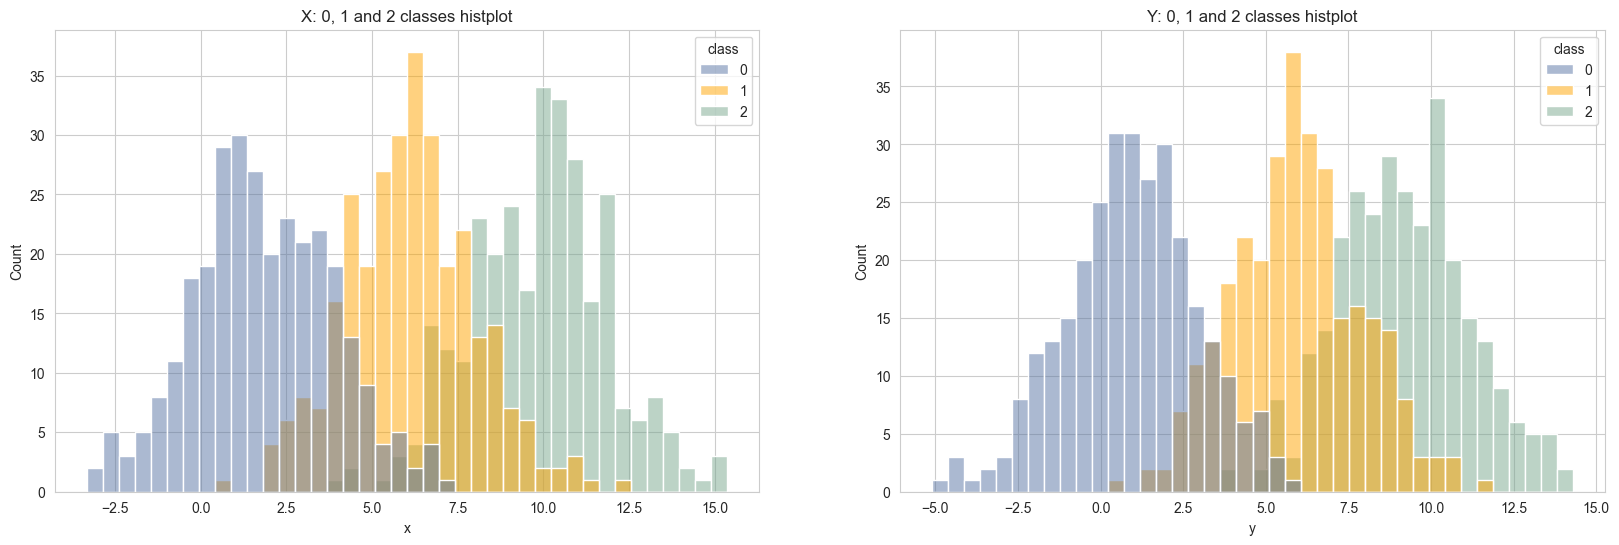

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(data=test_df2, x="x", ax=ax1, hue="class", palette=["#5975A4", "orange", "#7AA88F"], bins=40, multiple="layer")
ax1.set_title("X: 0, 1 and 2 classes histplot")

sns.histplot(data=test_df2, x="y", ax=ax2, hue="class", palette=["#5975A4", "orange", "#7AA88F"], bins=40, multiple="layer")
ax2.set_title("Y: 0, 1 and 2 classes histplot")

plt.show()

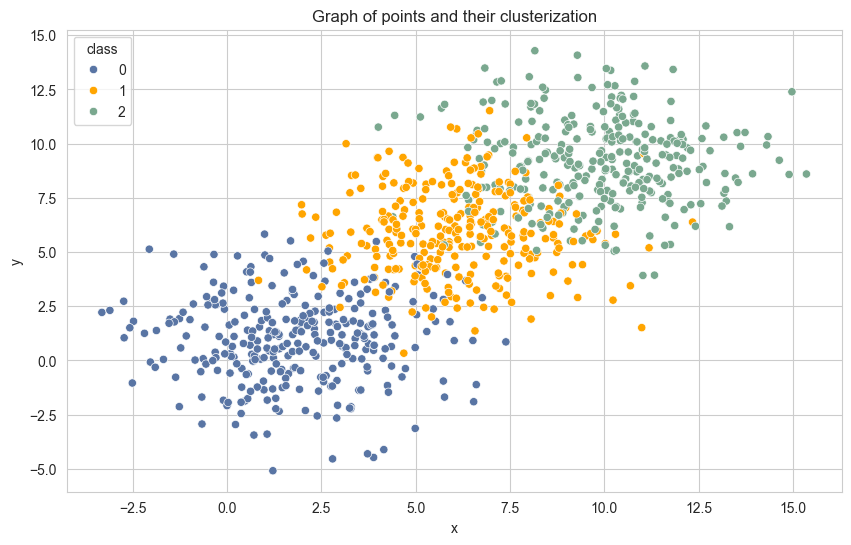

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.scatterplot(data=test_df2, x="x", y="y", hue="class", palette=["#5975A4", "orange", "#7AA88F"], ax=ax)
ax.set_title("Graph of points and their clusterization")

plt.show()

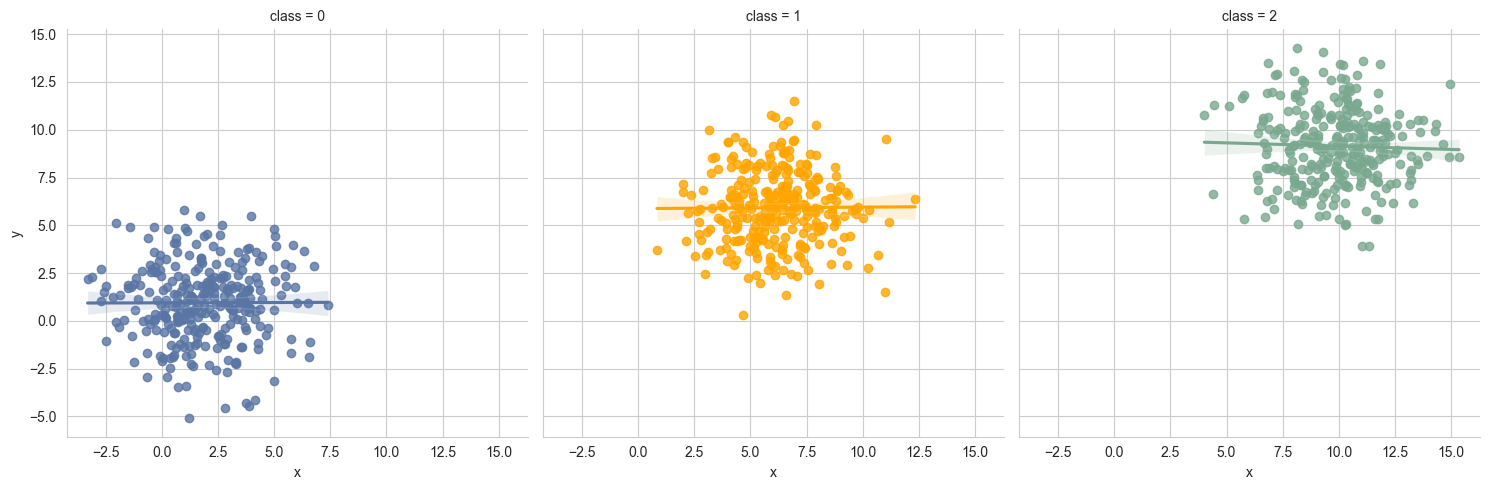

In [17]:
sns.lmplot(x="x", y="y", col="class", hue="class", data=test_df2, col_wrap=3, height=5, palette=["#5975A4", "orange", "#7AA88F"])
plt.show()

**`Висновок:`**

1. Центроїди трьох класів знаходяться далеко один від одного. Тому, аби додати перекриття класів, я знову використала змінну `noise`, але зі значно більшим значенням - 2. Зі збільшенням цього показника дані трьох класів будуть більше накладатись. 

2. Лінії регресії на графіках кореляції показують, що залежність між `x` та `y` відсутня, оскільки лінія не має нахилу. 

3. Гістограми розподілу відрізняються від попередніх тим, що вони перетинаються між собою, оскільки ми додали часткове перекриття для множин і наші дані більше не є лінійно роздільними.

**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз'яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

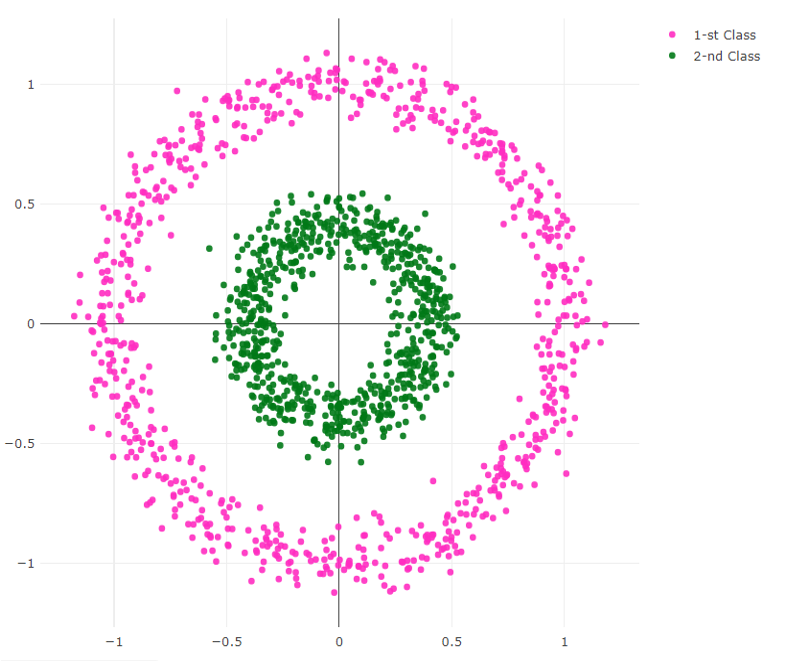

In [18]:
big_r1, big_r2 = 9, 1
small_r1, small_r2 = 4, 1

noise = 0.3
samples = 500

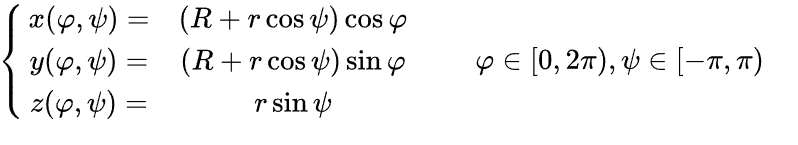

In [19]:
big_theta = np.random.uniform(0, 2 * np.pi, samples)
big_phi = np.random.uniform(-np.pi, np.pi, samples)

small_theta = np.random.uniform(0, 2 * np.pi, samples)
small_phi = np.random.uniform(-np.pi, np.pi, samples)

In [20]:
big_x = (big_r1 + big_r2 * np.cos(big_theta)) * np.cos(big_phi) + np.random.normal(0, noise, samples)
big_y = (big_r1 + big_r2 * np.cos(big_theta)) * np.sin(big_phi) + np.random.normal(0, noise, samples)
labels_0 = np.zeros(samples)

small_x = (small_r1 + small_r2 * np.cos(small_theta)) * np.cos(small_phi) + np.random.normal(0, noise, samples)
small_y = (small_r1 + small_r2 * np.cos(small_theta)) * np.sin(small_phi) + np.random.normal(0, noise, samples)
labels_1 = np.ones(samples)

In [21]:
big_torus_df = pd.DataFrame({"x": big_x, "y": big_y, "class": labels_0})
small_torus_df = pd.DataFrame({"x": small_x, "y": small_y, "class": labels_1})

test_df3 = pd.concat([big_torus_df, small_torus_df])
test_df3["class"] = test_df3["class"].astype('int64')
test_df3.to_csv("./third_test_dataset", index=False)

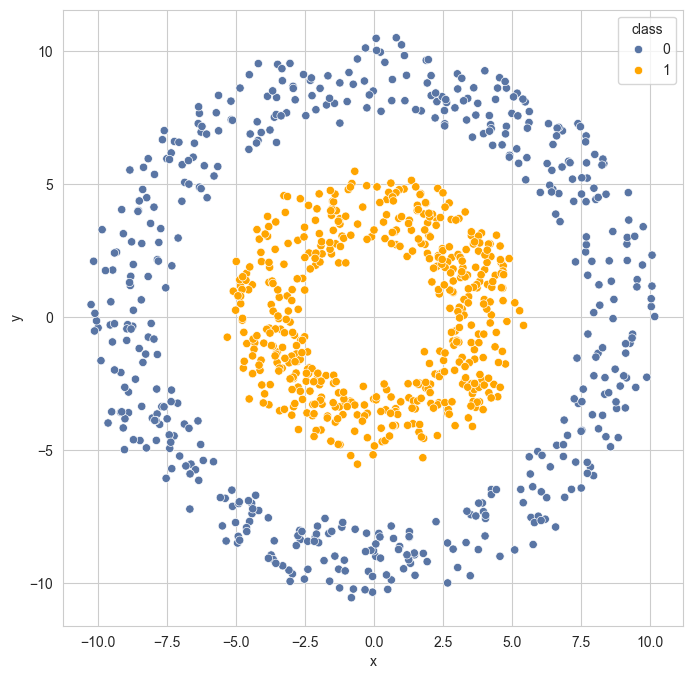

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

sns.scatterplot(data=test_df3, x='x', y='y', hue="class", palette=['#5975A4', 'orange'], ax=ax)
plt.show()

**`Висновок:`**

1. На початку в змінних я зберігла радіуси для меншого та більшого торів, які пізніше використала у формулі.

2. Аби згенерувати тор, необхідно використати параметричне рівняння тора, маючи зовнішній та внутрішній радіуси, а також кут phi та кут theta. Кути генеруються за допомогою методу `np.random.uniform`, який генерує кути в проміжку [0, 2π) та [-π, π) відповідно.

3. Також, аби додати шум, використовуємо `np.random.normal` зі вказаною змінною `noise (0.5)`. Чим більшим є цей показник, тим більш розбіжні дані в результаті.

**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз'яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

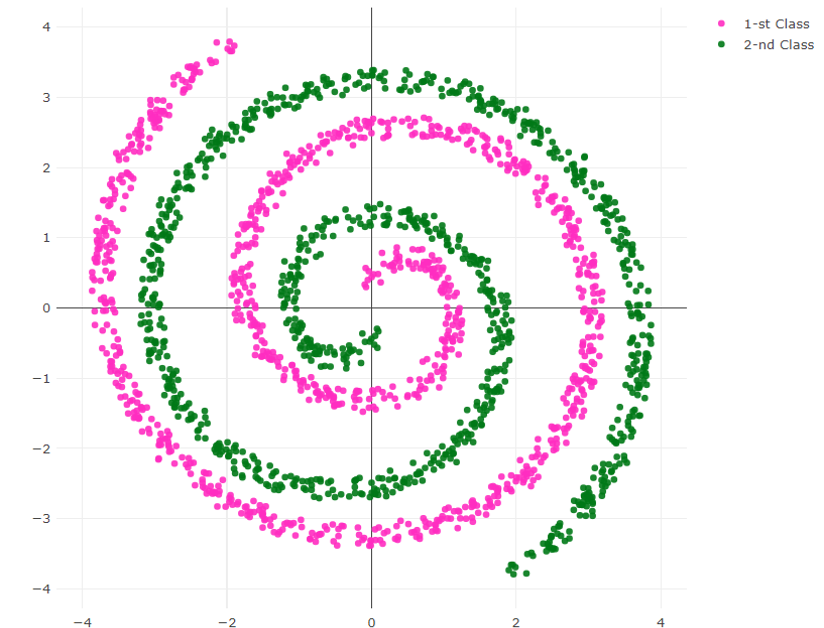

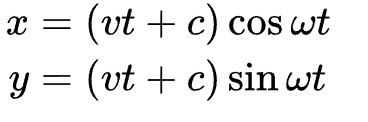

In [23]:
samples = 500
noise = 0.2
turns = 3

theta_1 = np.random.uniform(0, turns * 2 * np.pi, samples)
theta_2 = np.random.uniform(0, turns * 2 * np.pi, samples)

In [24]:
x_1 = (theta_1 * np.cos(theta_1)) + np.random.normal(0, noise, samples)
y_1 = (theta_1 * np.sin(theta_1)) + np.random.normal(0, noise, samples)
labels_0 = np.zeros(samples).astype('int64')

In [25]:
x_2 = (-theta_2 * np.cos(theta_2)) + np.random.normal(0, noise, samples)
y_2 = (-theta_2 * np.sin(theta_2)) + np.random.normal(0, noise, samples)
labels_1 = np.ones(samples).astype('int64')

In [26]:
spiral_1 = pd.DataFrame({"x": x_1, "y": y_1, "class": labels_0}) 
spiral_2 = pd.DataFrame({"x": x_2, "y": y_2, "class": labels_1}) 

test_df4 = pd.concat([spiral_1, spiral_2])
test_df4["class"] = test_df4["class"]
test_df4.to_csv("./fourth_test_dataset", index=False)

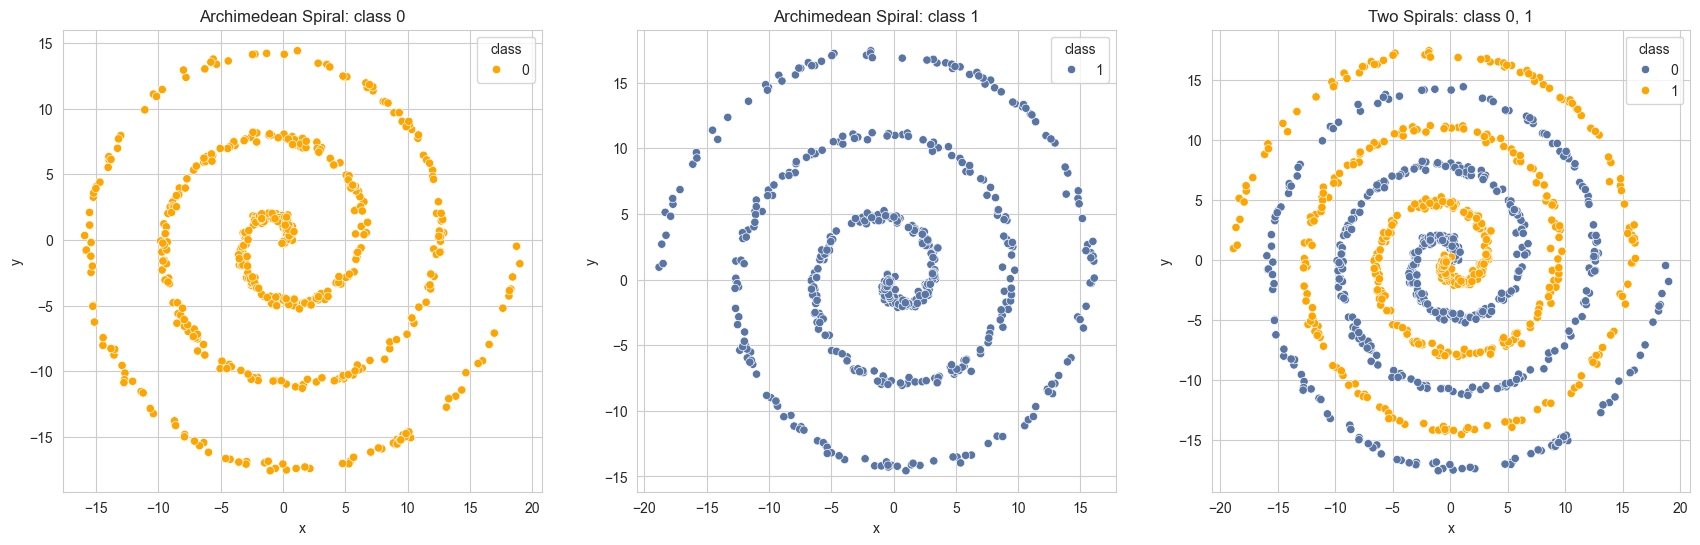

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 6))

sns.scatterplot(data=spiral_1, x='x', y='y', hue="class", palette=['orange'], ax=ax1)
ax1.set_title("Archimedean Spiral: class 0")

sns.scatterplot(data=spiral_2, x='x', y='y', hue="class", palette=['#5975A4'], ax=ax2)
ax2.set_title("Archimedean Spiral: class 1")

sns.scatterplot(data=test_df4, x='x', y='y', hue="class", palette=['#5975A4', 'orange'], ax=ax3)
ax3.set_title("Two Spirals: class 0, 1")

plt.show()

**`Висновок:`**

1. Для генерації спіралей використовувалося параметричне рівняння спіралі Архімеда. Для спіралі з протилежним напрямком на початку формули додався мінус. 

2. Так само визначалися параметри, такі як `noise` та `samples`. Попередньо обчислювалися кути для спіралей. Формули кутів містять параметр `turns`, який визначає, як сильно буде закручуватись спіраль.

**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз'яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

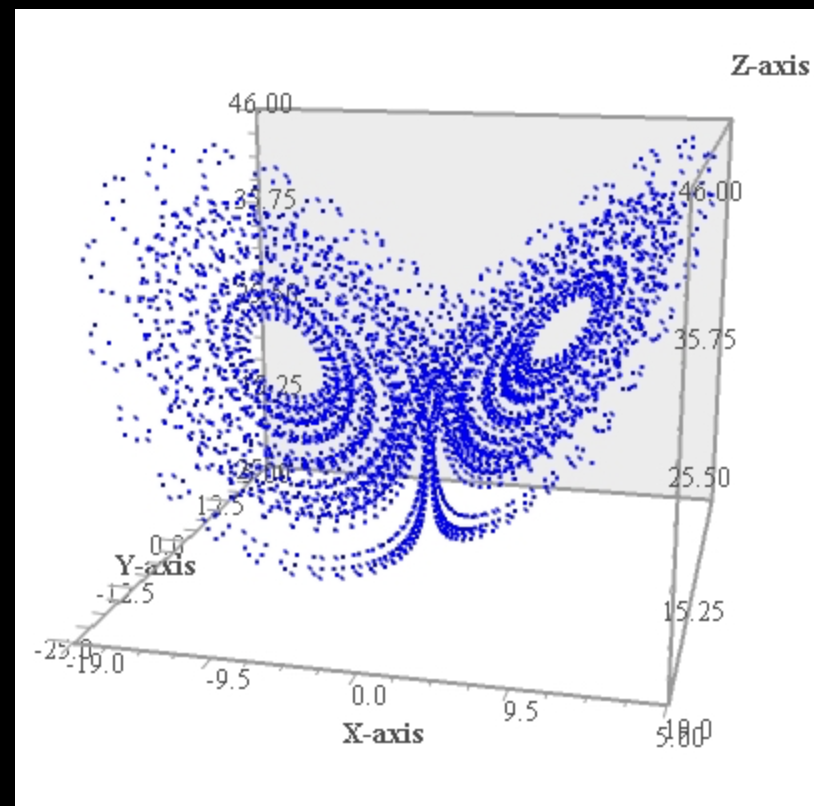

In [28]:
def lorenz(state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return np.array([dxdt, dydt, dzdt])

In [29]:
def runge_kutta_4(lorenz_func, y0, t, sigma, rho, beta):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    h = t[1] - t[0] 

    for i in range(1, n):
        yi = y[i-1]
        k1 = h * lorenz_func(yi, sigma, rho, beta)
        k2 = h * lorenz_func(yi + 0.5 * k1, sigma, rho, beta)
        k3 = h * lorenz_func(yi + 0.5 * k2, sigma, rho, beta)
        k4 = h * lorenz_func(yi + k3, sigma, rho, beta)
        y[i] = yi + (k1 + 2*k2 + 2*k3 + k4) / 6
    return y

In [30]:
def create_df(sigma, rho, beta):
    y0 = np.array([1, 0, 0]) 
    t = np.linspace(0, 50, 10000)  
    
    data = runge_kutta_4(lorenz, y0, t, sigma, rho, beta)

    return data

In [31]:
def save(data, filename):
    df = pd.DataFrame(data, columns=['x', 'y', 'z'])
    df.to_csv(filename, index=False)

In [32]:
def calc(sigma, rho, beta, filename):
    y0 = np.array([1, 0, 0]) 
    t = np.linspace(0, 50, 10000) 

    solution = runge_kutta_4(lorenz, y0, t, sigma, rho, beta)
    
    save(solution, filename)
    
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(solution[:, 0], solution[:, 1], solution[:, 2])
    ax.set_title(f'Lorenz System (σ={sigma}, ρ={rho}, β={beta})')
    plt.show()

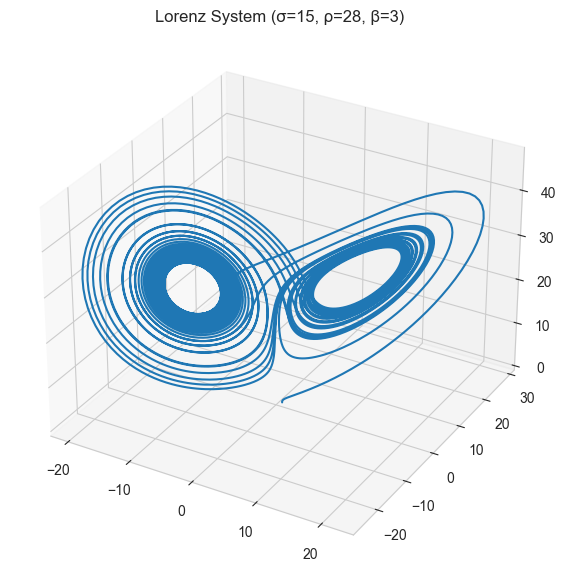

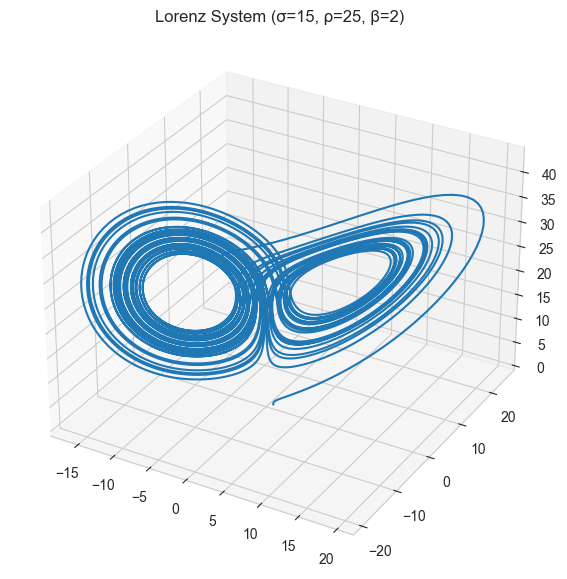

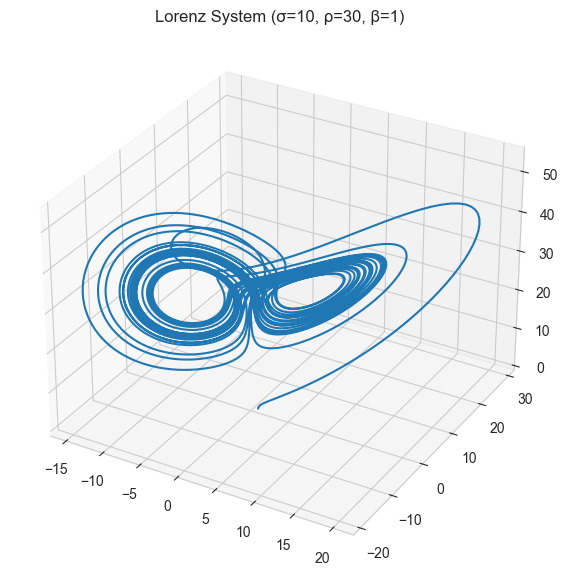

In [33]:
calc(15, 28, 3, "./fifth_test_dataset_1")
calc(15, 25, 2, "./fifth_test_dataset_2")
calc(10, 30, 1, "./fifth_test_dataset_3")

**`Висновок:`**

1. Зі збільшенням параметру `швидкості зміни` система стає більш динамічною.

2. Параметр `різниці` температур робить систему або більш стабільною (за низьких значень), або більш хаотичною(за більших значень).

3. Параметр `співвідношення розміру` також впливає на стабільність (за низьких значень)/хаотичність (за високих значень) системи.

4. Дякую!